# Import Required Libraries
Import necessary libraries such as pandas, numpy, scikit-learn, matplotlib, and seaborn for clustering and visualization.

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")

# Load Dataset with Embeddings
Load the previously generated dataset containing embeddings into a pandas DataFrame.

In [2]:
# Load dataset with embeddings
df = pd.read_json('output_folder\\dataset_with_2d_embeddings.json', lines=True)

# Inspect the DataFrame
print(df.head())

               ghsa_id          cve_id  \
0  GHSA-472w-7w45-g3w5            None   
1  GHSA-hmp7-x699-cvhq            None   
2  GHSA-rq77-p4h8-4crw  CVE-2025-24358   
3  GHSA-vw58-ph65-6rxp  CVE-2024-47822   
4  GHSA-7vpp-9cxj-q8gv   CVE-2025-3445   

                                                 url  \
0  https://api.github.com/advisories/GHSA-472w-7w...   
1  https://api.github.com/advisories/GHSA-hmp7-x6...   
2  https://api.github.com/advisories/GHSA-rq77-p4...   
3  https://api.github.com/advisories/GHSA-vw58-ph...   
4  https://api.github.com/advisories/GHSA-7vpp-9c...   

                                            html_url  \
0  https://github.com/advisories/GHSA-472w-7w45-g3w5   
1  https://github.com/advisories/GHSA-hmp7-x699-cvhq   
2  https://github.com/advisories/GHSA-rq77-p4h8-4crw   
3  https://github.com/advisories/GHSA-vw58-ph65-6rxp   
4  https://github.com/advisories/GHSA-7vpp-9cxj-q8gv   

                                             summary  \
0  Pleezer resour

# Prepare Embeddings for Clustering
Extract embeddings from the DataFrame and convert them into a suitable format (e.g., numpy array) for clustering.

In [3]:
# Extract embeddings into a numpy array
embeddings = np.array(df['embeddings_2d'].tolist(), dtype=np.float64)

# Check the shape of the embeddings array
print(f"Shape of DataFrame: {df.shape}")
print(f"Shape of Embeddings: {embeddings.shape}")
print(f"First few elements of Embeddings: {embeddings[:5]}")

Shape of DataFrame: (30, 25)
Shape of Embeddings: (30, 2)
First few elements of Embeddings: [[-0.00881678 -0.23436906]
 [-0.05930954 -0.16715766]
 [-0.17057552 -0.00413842]
 [ 0.00248742  0.00380218]
 [-0.14053244 -0.34239195]]


# Determine Optimal Number of Clusters
Use methods such as the Elbow method or Silhouette analysis to determine the optimal number of clusters.

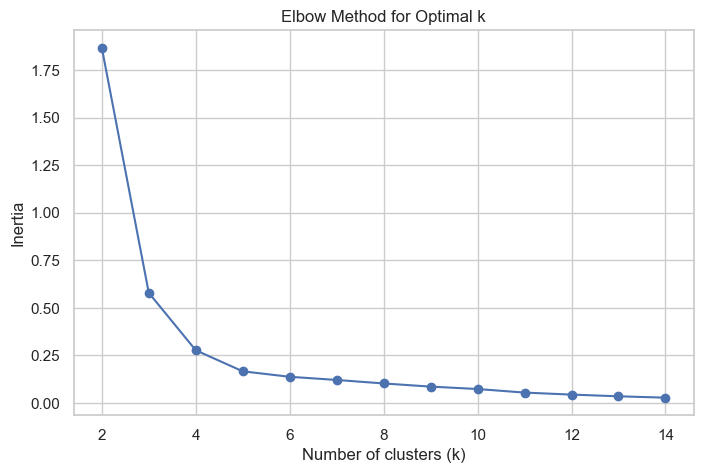

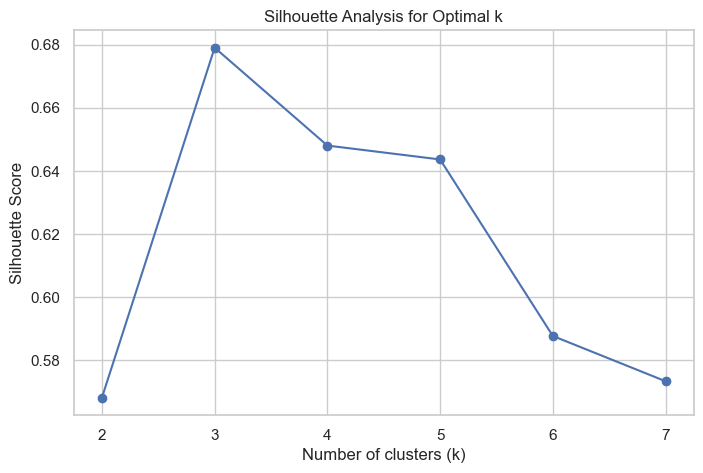

In [4]:
# Determine optimal number of clusters using Elbow method
inertia = []
k_range = range(2, 15)

# Calculate inertia for different values of k
# Innertia is the sum of squared distances to the nearest cluster center
# It helps to find the optimal number of clusters by looking for the "elbow" point in the plot
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(embeddings)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
# The Elbow method is a heuristic used in determining the number of clusters in a dataset.
# It involves plotting the explained variation as a function of the number of clusters and selecting the "elbow" of the curve as the number of clusters to use.
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Determine optimal number of clusters using Silhouette analysis
# Silhouette analysis is a method of interpretation and validation of consistency within clusters of data.
# The silhouette score measures how similar an object is to its own cluster compared to other clusters.
silhouette_scores = []
k_range = range(2, 8)  # smaller range for efficiency

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(embeddings)
    score = silhouette_score(embeddings, labels)
    silhouette_scores.append(score)

# Plot Silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')
plt.show()

# Perform Clustering
Apply clustering algorithms such as KMeans or DBSCAN to group embeddings into clusters.

In [6]:
# Choose optimal number of clusters based on previous analysis
optimal_k = 3

# Perform KMeans clustering
kmeans = KMeans(
    n_clusters=optimal_k,
    init='k-means++',
    n_init=20,
    max_iter=300,
    tol=1e-4,
    random_state=42,
    verbose=1
)

# Fit the model to the embeddings
df['cluster'] = kmeans.fit_predict(embeddings)


# Inspect cluster distribution
print(df['cluster'].value_counts())

Initialization complete
Iteration 0, inertia 0.684612056539509.
Iteration 1, inertia 0.5786102972949416.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 2.1969730182661356.
Iteration 1, inertia 1.2030513321087453.
Iteration 2, inertia 1.1172123295562437.
Iteration 3, inertia 0.9189070404805317.
Iteration 4, inertia 0.6839677656171779.
Iteration 5, inertia 0.6732772244710006.
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 0.9271839537549164.
Iteration 1, inertia 0.5961744717721111.
Iteration 2, inertia 0.5786102972949416.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 0.8202023627123908.
Iteration 1, inertia 0.6732772244710006.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 0.6382404675572716.
Iteration 1, inertia 0.5786102972949416.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0,

# Visualize Clusters
Visualize the resulting clusters using dimensionality reduction techniques like PCA or t-SNE.

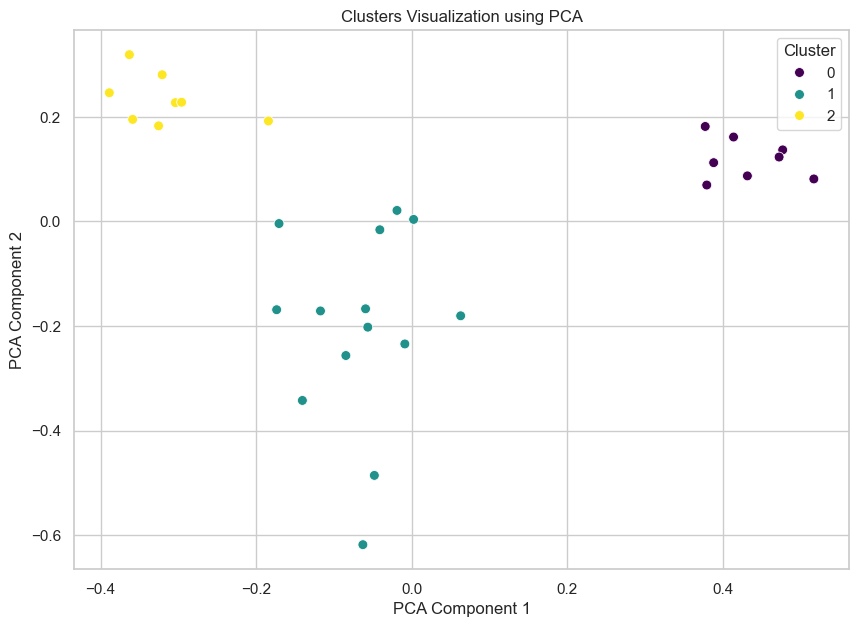

In [7]:
# Reduce dimensionality using PCA
#pca = PCA(n_components=2, random_state=42) 
#reduced_embeddings = pca.fit_transform(embeddings) 

# Plot clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=embeddings[:,0], y=embeddings[:,1], hue=df['cluster'], palette='viridis', s=50) 
plt.title('Clusters Visualization using PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

# Save Clustered Data
Save the DataFrame with cluster labels to a new file for further analysis.

In [8]:
# Save clustered DataFrame to JSON file
df.to_json('output_folder\\clustered_dataset.json', orient='records', lines=True)

print("Clustered dataset has been successfully saved to 'clustered_dataset.json'.")

Clustered dataset has been successfully saved to 'clustered_dataset.json'.
